In [10]:
import numpy as np
from sklearn.datasets import load_iris

In [24]:
class Perceptron:
    def __init__(self, lr, max_iter, random_state=0) -> None:
        self.lr: float = lr
        self.max_iter: int = max_iter
        self.random_state: int = random_state
        self.errors = []

    def fit(self, xs, ys):
        n_samples, n_features = xs.shape
        np.random.seed(self.random_state)
        self.weights = np.random.random(size=(n_features))
        self.biases = np.random.random(1)[0]

        for _ in range(self.max_iter):
            error_this_iter = 0
            for xi, yi in zip(xs, ys):
                y_pred = self.predict(xi)
                error = yi - y_pred
                # update weights and biases
                self.weights += self.lr * error * xi
                self.biases += self.lr * error
                error_this_iter += int(error != 0)
            self.errors.append(error_this_iter)
        return self

    def predict(self, xs):
        """Return class label after unit step."""
        return np.where(self.net_input(xs) >= 0.0, 1, 0)

    def net_input(self, xs):
        """Calculates net input."""
        return np.dot(xs, self.weights) + self.biases


dataset = load_iris()
xs, ys = dataset.data, dataset.target

mask = [y == 0 or y == 1 for y in ys]
xs = xs[mask][:, :2]
ys = ys[mask]

perceptron = Perceptron(lr=0.1, max_iter=50)
perceptron.fit(xs, ys)
y_preds = perceptron.predict(xs)
acc = np.mean(ys == y_preds)
acc

0.97

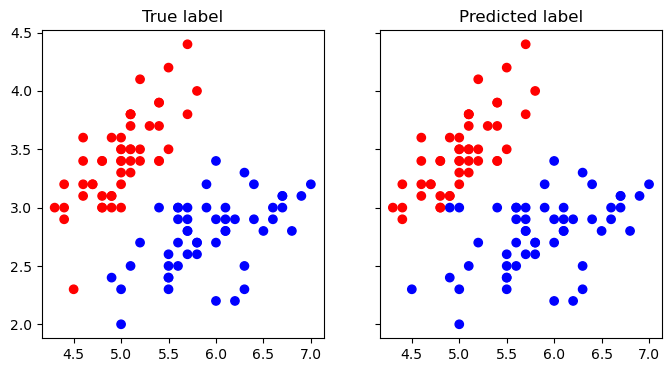

In [25]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 4))

ax1.scatter(xs[:, 0], xs[:, 1], color=["red" if y == 0 else "blue" for y in ys])
ax1.set_title("True label")

ax2.scatter(xs[:, 0], xs[:, 1], color=["red" if y == 0 else "blue" for y in y_preds])
ax2.set_title("Predicted label")
plt.show()